## Manejando datos con Pandas

En este notebook, aplicaremos lo aprendido para sacar información a partir de un dataset real.

Usaremos este dataset de _Kaggle_ https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?resource=download, que contiene datos de las 1000 mejores películas y series de la historia según IMDB.

Para que no tengáis que crearos una cuenta en Kaggle, hemos subido el dataset a la página web del curso también.

_NOTA: El esquema de los datos se puede consultar en la página, pero también lo revisaremos (y adaptaremos) a lo largo de este notebook_

## Como usar este notebook
El objetivo es complementar lo visto en la clase de pandas, así que (en su mayoría) usaremos las funciones vistas ahí.

A lo largo del notebook habrá ejercicios propuestos. __Para que todo funcione bien, ¡deberían completarse antes de continuar ejecutando!__

__Si téneis dudas u os atascáis, ¡avisadnos!__

Un recordatorio acerca de los Notebooks: si queremos imprimir algo que está en la última fila de la celda, __no hace falta usar print()__. De hecho, para imprimir datasets de pandas, es buena idea hacerlo de esta forma en vez que usar `print(df)` en medio de la celda, ya que se imprimirá con un formato más chulo (también se puede forzar esto con `display(df)`). 

De todas formas, a veces si usamos `print()` al final de las celdas, no es obligatorio omitirlo.

In [57]:
# En primer lugar, importamos pandas y numpy, además de algunas librerías necesarias com os
import numpy as np
import pandas as pd
import os

In [58]:
# Debemos configurar el path del que leeremos el dataset. En nuestro caso, el dataset se encuentra en la carpeta data que esta un nivel por encima de la carpeta en la que se encuentra este script.
# Es decir este es nuestro esquema de directorios
# (DIRECTORIO BASE)
# | -- data
# | -- | imdb_top_1000.csv
# | -- | ...
# | -- notebooks
# | -- | imdb_analysis.ipynb
# | -- | ...	
# | -- ...

# Recordemos que para subir un nivel en el árbol de directorios, usamos ..
# EJERCICIO 0. Cambiar este path para que apunte a vuestro archivo imdb_top_1000.csv
# NOTA: puede que tengáis que quitar los .. o añadir otras rutas, no hace falta seguir el esquema de directorios que he puesto arriba!
data_folder = os.path.join('..', 'data')
file_name = 'imdb_top_1000.csv'
path = os.path.join(data_folder, file_name)


In [59]:
# Ahora podemos leer el dataset con pandas e imprimir los tipos de datos de cada columna
# Usamos .read_csv para leer el archivo csv y .dtypes para obtener los tipos de datos de cada columna
df = pd.read_csv(path)
print(df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


## Exploración y limpieza de datos
- La primera fase de un proyecto de análisis de datos es extraer la información útil dentro de cada dataset
- A este proceso se le llama limpieza, pre-procesamiento o preparación de los datos
- Muy pocos datasets son perfectos, normalmente necesitamos adaptarlos a nuestros objetivos

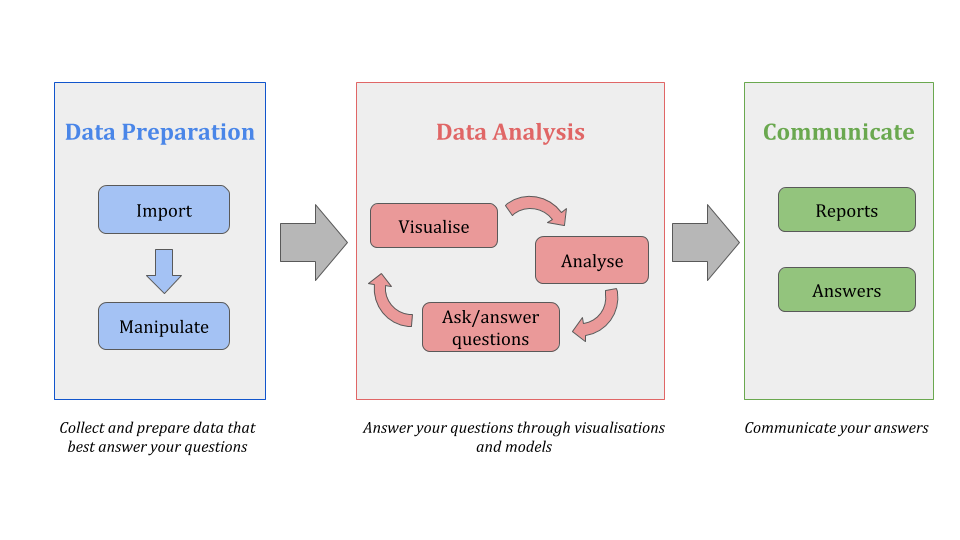

In [60]:
# Lo primero que podemos querer aprender, es cómo de grande es el dataset.

# Ejercicio 1: Imprime el número de filas y columnas del dataset
# TODO BORRAR
print('Filas:', df.shape[0])
print('Columnas:', df.shape[1])

# Solución: 10000 filas y 16 columnas

Filas: 1000
Columnas: 16


In [61]:
# También podemos querer ver las primeras filas del dataset para hacernos una idea de cómo es
# NOTA: usamos print aquí para poder clickar los links, pero se ve más bonito con df.head(3) directamente!
print(df.head(3))

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1           Star2          Star3  \
0 

In [62]:
# Clickando en los primeros Poster_link, vemos que son links a imágenes que están caídas. Podemos eliminar esta columna.
# Ejercicio 2: Elimina la columna Poster_Link del dataset e imprime otra vez las 3 primeras filas
# TODO BORRAR
df = df.drop(columns='Poster_Link')
print(df.head(3))

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   

    

In [63]:
# Ahora veamos si el dataset tiene valores nulos
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [64]:
# En primer lugar, hay valores nulos en 'Certificate', que contiene la clasificación por edades de las películas. 
# Este valor se puede rellenar fácilmente, veamos qué tipos de valores admite esta columna
print(df['Certificate'].unique())

# Podemos entonces cambiar los valores nulos por 'Unrated'
df['Certificate'] = df['Certificate'].fillna('Unrated')

# Y ya no tenemos NaNs en la columna Certificate
print(df['Certificate'].isna().sum())

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']
0


In [65]:
# También tenemos valoes nulos en Meta_score, que es la puntuación de las películas en Metacritic, y en Gross, que es el dinero que ha recaudado la película.
# Imputar estos datos es más complicado, quizás se podría hacer con la media de los valores no nulos, pero en este caso, vamos a eliminar las filas con valores nulos.

# Ejercicio 3. Eliminar las filas que contienen valores nulos en Meta_score o en Gross.
# TODO BORRAR
df = df.dropna()
print(df.isna().sum())

# NOTA: El nuevo tamaño del dataset debería ser (750, 15)

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [66]:
# A continuación, veamos si hay títulos duplicados.
print(df['Series_Title'].duplicated().sum())

# En este caso, no hay problema de datos duplicados!

0


In [67]:
# Hay algunos ajustes más que hacer. La columna "Gross" está en un formato inadecuado para hacer cálculos.
print(df.dtypes)
# Imprimiendo dtypes vemos que es un "object" en vez de un entero o float
# Veamos que tipo de datos tenemos aquí
print(df['Gross'].head(10)) 

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
5    377,845,905
6    107,928,762
7     96,898,818
8    292,576,195
9     37,030,102
Name: Gross, dtype: object


In [68]:
# Se trata de números en formato xx,xxx,xxx,xxx, que no son reconocidos como números por Python.
# Para convertirlos a números, podemos primero eliminar las comas y luego convertir a datos numéricos usando pd.to_numeric()
# La opción errors='coerce' coloca NaNs cuando no se puede realizar la conversión
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# El proceso funciono perfectamente, ya que no hay NaNs tras la conversión
print(df['Gross'].isna().sum())

0


In [69]:
# Runtime tiene un problema parecido, el formato es de "xx min", y no es reconocido como un número.
print(df['Runtime'].head(10))


0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
5    201 min
6    154 min
7    195 min
8    148 min
9    139 min
Name: Runtime, dtype: object


In [70]:
# Ejercicio 4: Convierte la columna Runtime a un número entero representando el número de minutos que dura la película
# TODO BORRAR
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
print(df['Runtime'].isna().sum())

0


In [71]:
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [72]:
# Por último, observamos que en "Genre" hay varios géneros separados por comas.
# Veamos cuál es la fila con más generos. Este comando es algo más complicado (no hace falta que miréis esto en detalle) pero funciona así
# 1. df['Genere'].str saca la columna Genre como una serie de pandas (es decir, una lista de strings)
print(df['Genre'].str)
# 2. .str.split(',') divide cada string en la lista por comas, creando una lista de listas
print(df['Genre'].str.split(','))
# 3. .apply(len) aplica la función len a cada lista, devolviendo el número de elementos de cada lista
print(df['Genre'].str.split(',').apply(len))
# 4. .max() devuelve el máximo de la serie
max_genres = df['Genre'].str.split(',').apply(len).max()

0                               [Drama]
1                       [Crime,  Drama]
2              [Action,  Crime,  Drama]
3                       [Crime,  Drama]
4                       [Crime,  Drama]
                     ...               
990             [Drama,  War,  Western]
991          [Adventure,  Comedy,  War]
992    [Animation,  Adventure,  Family]
994          [Comedy,  Music,  Musical]
997             [Drama,  Romance,  War]
Name: Genre, Length: 750, dtype: object
0      1
1      2
2      3
3      2
4      2
      ..
990    3
991    3
992    3
994    3
997    3
Name: Genre, Length: 750, dtype: int64


In [73]:
print("Máximo de géneros por película:", max_genres)	

# Ahora lo que haremos será seguir replicar la idea de poner cada actor estrella en una columna, pero para los géneros. 
# Movemos los datos en formato Genre1, Genre2, Genre3 a las columnas Genre1, Genre2 y Genre3, que son suficientes gracias al cálculo de max_genres, 
# para las películas con menos de 3 géneros, se rellenará con NaNs.
# Para manipular las strings de un dataframe, podemos usar .str, luego usamos .replace() y .split() para extraer la lista de géneros
# e.g. Drama, Action, Adventure -> Drama,Action,Adventure -> ['Drama', 'Action', 'Adventure']
# Con la opción expand=True, se rellena con NaNs cuando no hay suficientes datos en el array que devuelve .split()
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.replace(' ', '').str.split(',', expand=True)
df = df.drop(columns='Genre')


Máximo de géneros por película: 3


In [74]:
# Ahora cada uno de los géneros está al final del dataset en las columnas Genre1, Genre2 y Genre3
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre1,Genre2,Genre3
0,The Shawshank Redemption,1994,A,142,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,Drama,None,None
1,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,Crime,Drama,None
2,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Action,Crime,Drama
3,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,Crime,Drama,None
4,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,Crime,Drama,None


In [75]:
# Podemos ver cuántas películas tienen un solo género o solo 2 mirando la cantidad de NaNs
print("Total de películas:", df.shape[0])
print("Películas con un solo género:", df['Genre2'].isna().sum())
print("Películas con dos géneros:", df['Genre3'].isna().sum())
print("Películas con tres géneros:", df['Genre3'].notna().sum())

# Por supuesto, el dato más importante será Genre1 ya que está disponible en todas las filas 
# NOTA: no sabemos hasta que punto Genre1 es el género "principal" de la película, los datos originales solo lo colocaban como primero en la lista dada

Total de películas: 750
Películas con un solo género: 85
Películas con dos géneros: 258
Películas con tres géneros: 492


In [76]:
# Para completar la limpieza inicial, vamos a ver cuántos valores únicos hay en cada columna
df.nunique()

Series_Title     750
Released_Year     88
Certificate       13
Runtime          121
IMDB_Rating       17
Overview         750
Meta_score        63
Director         426
Star1            500
Star2            634
Star3            657
Star4            705
No_of_Votes      750
Gross            745
Genre1            13
Genre2            20
Genre3            18
dtype: int64

In [77]:
# Y también vamos a describir el dataset para ver si hay valores extraños
df.describe()

# Como vemos, la puntuación IMDB promedio de las 1000 mejores películas es 7.9 (lo cuál es bastante exigente) y la mejor película tiene un 9.3 (la perfección no existe!)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,750.000000,750.000000,750.000000,7.500000e+02,7.500000e+02
mean,123.302667,7.934800,77.460000,3.421327e+05,7.495207e+07
std,26.020745,0.289103,12.493967,3.509795e+05,1.133280e+08
min,71.000000,7.600000,28.000000,2.519800e+04,1.305000e+03
25%,104.000000,7.700000,70.000000,8.854725e+04,5.014812e+06
50%,120.000000,7.900000,78.000000,2.197340e+05,3.190000e+07
75%,136.000000,8.100000,86.000000,4.812185e+05,9.809157e+07
max,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [ ]:
# Ya tenemos todos los datos limpios, así que ahora podemos guardarlos como un nuevo archivo csv
# Usaremos este .csv con los datos limpios en las siguientes sesiones (de matplotlib y scikit-learn)
output_path = os.path.join(data_folder, 'imdb_top_1000_clean.csv')
print("Guardando el archivo en:", output_path)
df.to_csv(output_path, index=False)

Guardando el archivo en: ../data/imdb_top_1000_clean.csv


## Análisis estadístico (descriptivo) de los datos
Ahora veamos algunos ejemplos básicos de análisis estádistico de los datos. Este dataset contiene información muy interesante y nos podemos hacer muchas preguntas:
- ¿Qué película tiene mejor puntuación?
- ¿Qué género es más popular en el top 1000?
- ¿Existen correlación entre género, duración u otros datos y puntuación de la película?
- ¿Qué actores aparecen en más películas?

¡Veamos como darle respuesta a estas preguntas!

<Axes: >

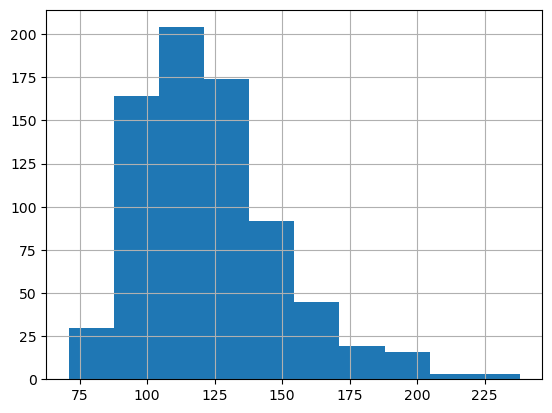

In [79]:
# En primer lugar, vamos a ver algunos histogramas acerca de los datos para entender mejor cómo sonç
# Normalmente esto se hace con matplotlib, que incluye muchísimos tipos de plots diferentes y configuracinones.
# Usaremos matplotlib en la siguiente clase, de momento usaremos la funcionalidad básica de pandas
df["Runtime"].hist()

<Axes: >

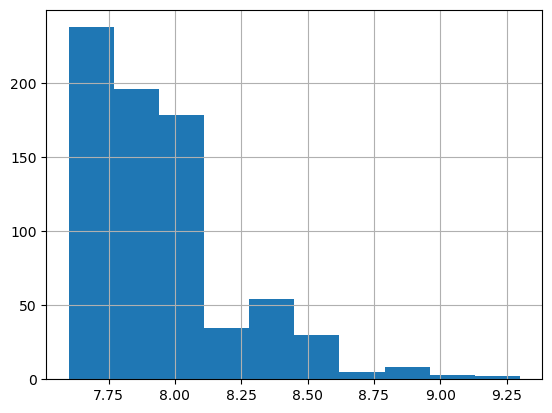

In [80]:
df["IMDB_Rating"].hist()

In [81]:
# Ahora comencemos a responder a algunas de las preguntas de arriba.

# 1. ¿Cuál es la película más larga?
# Para esto, simplemente ordenamos por runtime con .sort_values() y seleccionamos la primera fila con .iloc
longest_movie = df.sort_values('Runtime', ascending=False).iloc[0, :]
print(longest_movie)

# ...y sale "Lo que el viento se llevó", makes sense!

Series_Title                                    Gone with the Wind
Released_Year                                                 1939
Certificate                                                      U
Runtime                                                        238
IMDB_Rating                                                    8.1
Overview         A manipulative woman and a roguish man conduct...
Meta_score                                                    97.0
Director                                            Victor Fleming
Star1                                                 George Cukor
Star2                                                     Sam Wood
Star3                                                  Clark Gable
Star4                                                 Vivien Leigh
No_of_Votes                                                 290074
Gross                                                    198676459
Genre1                                                       D

In [82]:
# Ejercicio 5. ¿Cuáles son las 5 mejores películas según la puntuación de IMDB?
# TODO BORRAR
best_movies = df.sort_values('IMDB_Rating', ascending=False).iloc[0:5, :].reset_index(drop=True)
best_movies[["Series_Title", "IMDB_Rating"]]

# Solución:
# 1. "The Shawshank Redemption" con un 9.3
# 2. "The Godfather" con un 9.2
# 3. "The Dark Knight" con un 9.0
# 4. "12 Angry Men" con un 9.0
# 5. "The Godfather: Part II" con un 9.0

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,12 Angry Men,9.0
4,The Godfather: Part II,9.0


In [83]:
# Veamos ahora qué generos son más populares en el top 1000. Recordemos que los géneros están en 3 columnas distintas, que en este
# caso consideraremos iguales.

# Contamos cuantas veces aparece cada género en cada columna
# .value_counts() es una función muy útil para trabajar con datos categóricos, calcula cuántas veces aparece cada valor en una serie
# (es decir, calcula un histograma para una columna de un dataframe)
genre1_counts = df['Genre1'].value_counts()
genre2_counts = df['Genre2'].value_counts()
genre3_counts = df['Genre3'].value_counts()

# Sumamos los conteos de cada género y ordenamos de mayor a menor
genre_counts = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0)
genre_counts = genre_counts.sort_values(ascending=False)
print(genre_counts)


Drama        531.0
Comedy       166.0
Adventure    165.0
Crime        151.0
Action       143.0
Thriller     104.0
Romance       91.0
Biography     88.0
Mystery       73.0
Animation     64.0
Sci-Fi        58.0
Fantasy       55.0
Family        45.0
History       39.0
War           33.0
Music         28.0
Horror        21.0
Sport         17.0
Western       16.0
Musical       11.0
Film-Noir      8.0
Name: count, dtype: float64


<Axes: >

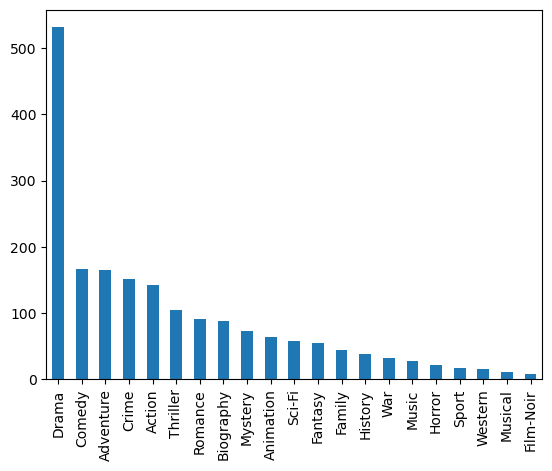

In [84]:
# Como vemos, el género más popular es Drama, seguido de Action y Comedy.
# Podemos hacer otro histograma con estos datos
genre_counts.plot(kind='bar')

In [85]:
# Ejercicio 6. ¿Cuál es la nota media en las películas cuyo que tienen acción en alguno de sus géneros (Genre1 o Genre2 o Genre3)? 
# ¿Y en las de comedia? Haz una función para que sea sencillo comprobar esto para cualquier género.
# TODO BORRAR
def mean_rating_by_genre(df, genre):
    genre_filter = (df['Genre1'] == genre) | (df['Genre2'] == genre) | (df['Genre3'] == genre)
    return df[genre_filter]['IMDB_Rating'].mean()
print("Nota media en películas de acción:", mean_rating_by_genre(df, 'Action'))
print("Nota media en películas de comedia:",mean_rating_by_genre(df, 'Comedy'))

# Solución:
# Nota media en películas de acción: 7.934965034965037
# Nota media en películas de comedia: 7.872891566265061

Nota media en películas de acción: 7.934965034965037
Nota media en películas de comedia: 7.872891566265061


In [86]:
# Veamos ahora la matriz de correlaciones entre las variables numéricas
# Una forma rápida de filtrar las columnas numéricas del dataset es con .select_dtypes
# (Aunque por supuesto, también podríamos hacerlo a mano)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Hay 2 correlaciones signficativas:
# - Entre la puntuación de IMDB y el número de votos (corr. positiva)
# - Entre el número de votos y el dinero recaudado (corr. positiva)

# Podemos visualizar estas dos correlaciones positivas con un scatter plot, 
# pero dejemos eso para la siguiente clase de matplotlib...

              Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
Runtime      1.000000     0.255907   -0.012211     0.217212  0.172840
IMDB_Rating  0.255907     1.000000    0.282690     0.614111  0.127845
Meta_score  -0.012211     0.282690    1.000000     0.010308 -0.030587
No_of_Votes  0.217212     0.614111    0.010308     1.000000  0.555461
Gross        0.172840     0.127845   -0.030587     0.555461  1.000000


In [87]:
# Al igual que antes, podemos ver que directores aparecen más veces en el top 1000
directores_peliculas = df['Director'].value_counts()
directores_peliculas.head(10)

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Clint Eastwood        8
Christopher Nolan     8
David Fincher         8
Quentin Tarantino     8
Woody Allen           7
Rob Reiner            7
Hayao Miyazaki        7
Name: count, dtype: int64

In [88]:
# También podemos averiguar qué directores tienen mejor puntuación media en sus películas en el top 1000

# Para ello, debemos agrupar el dataframe por director, también filtramos para incluir solo directores con al menos
# 3 películas para que sea más justo

# Filtramos la lista obtenida en la celda anterior para tener solo los directores con al menos 3 películas
# directores_filtrados es una Series de pandas, donde los índices son los nombres de los directores 
# y los valores son el número de películas que han dirigido. Extraemos los nombres de los directores con .index
directores_filtrados = directores_peliculas[directores_peliculas >= 3].index

# Ahora, filtramos el dataframe original para incluir solo los directores filtrados.
df_filtrado = df[df['Director'].isin(directores_filtrados)]

# Calculamos la puntuación media de IMDb por director. Para ello, usamos groupby para agrupar por director 
# y luego aplicamos la función mean()
director_media = df_filtrado.groupby('Director')['IMDB_Rating'].mean()

# Finalmente, ordenamos de mayor a menor
director_media = director_media.sort_values(ascending=False)
director_media.head(10)

Director
Christopher Nolan       8.462500
Francis Ford Coppola    8.400000
Peter Jackson           8.400000
Akira Kurosawa          8.333333
Stanley Kubrick         8.266667
Sergio Leone            8.240000
Billy Wilder            8.225000
Quentin Tarantino       8.175000
Martin Scorsese         8.170000
Bong Joon Ho            8.166667
Name: IMDB_Rating, dtype: float64

In [89]:
# Ejercicio 7. ¿Cuál es la mejor película por director en el top 1000?
# Imprime las 5 primeras filas de este dataframe con el nombre del director, su mejor película (con mayor IMDB Rating) 
# y su IMDB Rating.
# El dataset debe estar ordenado por IMDB_Rating.
# TODO BORRAR
df_filtrado = df_filtrado.sort_values('IMDB_Rating', ascending=False)
df_filtrado = df_filtrado.drop_duplicates(subset='Director', keep='first')
df_filtrado = df_filtrado[['Director', 'Series_Title', 'IMDB_Rating']].reset_index(drop=True)
df_filtrado.head(15)

# Solución:
# (índice)      Director	                Series_Title	                                    IMDB_Rating
# 0	            Francis Ford Coppola	    The Godfather	                                    9.2
# 1	            Sidney Lumet	            12 Angry Men	                                    9.0
# 2	            Christopher Nolan	        The Dark Knight	                                    9.0
# 3	            Quentin Tarantino	        Pulp Fiction	                                    8.9
# 4	            Peter Jackson	            The Lord of the Rings: The Return of the King	    8.9

,Director,Series_Title,IMDB_Rating
0,Francis Ford Coppola,The Godfather,9.2
1,Sidney Lumet,12 Angry Men,9.0
2,Christopher Nolan,The Dark Knight,9.0
3,Quentin Tarantino,Pulp Fiction,8.9
4,Peter Jackson,The Lord of the Rings: The Return of the King,8.9
5,Steven Spielberg,Schindler's List,8.9
6,David Fincher,Fight Club,8.8
7,Sergio Leone,"Il buono, il brutto, il cattivo",8.8
8,Robert Zemeckis,Forrest Gump,8.8
9,Martin Scorsese,Goodfellas,8.7
